In [6]:
from datasets import load_dataset,list_datasets
import huggingface_hub
import pandas as pd

In [7]:
emotions = load_dataset("emotion")

# emotions.set_format(type="pandas")
# df = emotions["train"][:]
# df.head()

Using the latest cached version of the module from C:\Users\20765\.cache\huggingface\modules\datasets_modules\datasets\emotion\cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd (last modified on Sat May 18 10:41:37 2024) since it couldn't be found locally at emotion, or remotely on the Hugging Face Hub.


In [8]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

# df["label_name"] = df["label"].apply(label_int2str)
# df.head()

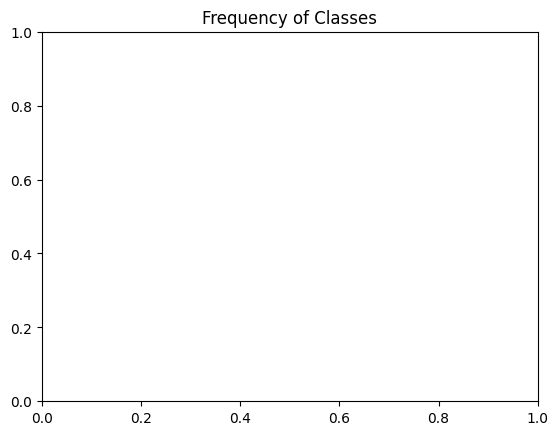

In [9]:
import matplotlib.pyplot as plt

# df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

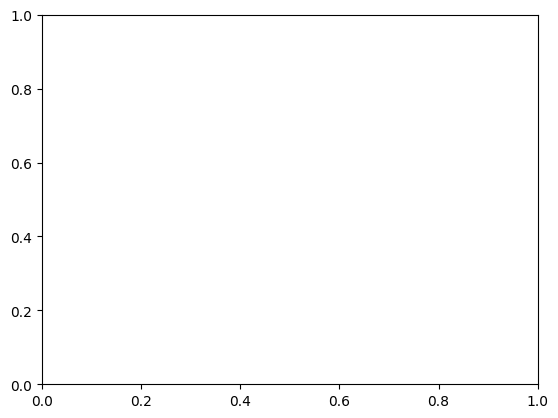

In [10]:
# df["Words Per Tweet"] = df["text"].str.split().apply(len)
# df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")

plt.suptitle("")
plt.xlabel("")
plt.show()

In [11]:
# 将文本转换成词元
# 词元化 tokenization

text_str = "Tokenizing text is a core task of NLP."
tokenized_text = list(text_str)
print(tokenized_text)


['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [12]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)


{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [13]:
input_ids = [token2idx[token] for token in tokenized_text]
# 每个词元都已映射到唯一的数字标识符
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [14]:
categorical_df = pd.DataFrame(
  {"Name":["Bumblebee", "Optimus Prime", "Megatron"], "Label ID":[0, 1, 2]}
)
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [15]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,True,False,False
1,False,False,True
2,False,True,False


In [16]:
# 在pytorch中，我们可以使用one_hot()函数对input_ids进行独热编码
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [17]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [18]:
# 单词词元化
tokenized_text = text_str.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [20]:
from transformers import AutoTokenizer, DistilBertModel
from transformers import DistilBertTokenizer

# distilbert_tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
distilbert_tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")
encoded_text = distilbert_tokenizer(text_str)
print(encoded_text)


{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [21]:
tokens = distilbert_tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [22]:
print(distilbert_tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp . [SEP]


In [23]:
distilbert_tokenizer.vocab_size

30522

In [24]:
distilbert_tokenizer.model_max_length

512

In [25]:
distilbert_tokenizer.model_input_names

['input_ids', 'attention_mask']

In [26]:

def tokenize(batch):
  return distilbert_tokenizer(list(list(batch["text"])), padding=True, truncation=True)


In [27]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [28]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

In [29]:
print(emotions_encoded["train"])
# print(emotions["train"].column_names)

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 16000
})


In [30]:
from transformers import AutoModel
model_ckpt = "distilbert-base-uncased"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [31]:
text = "this is a test"
inputs = distilbert_tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs.input_ids.size()}")


Input tensor shape: torch.Size([1, 6])


In [32]:
inputs = {k:v.to(device) for k, v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)

print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [33]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [34]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [35]:
def extract_hidden_states(batch):
  inputs = {k:v.to(device) for k, v in batch.items() if k in distilbert_tokenizer.model_input_names}

  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [36]:
emotions_encoded.set_format("torch",columns=["input_ids","attention_mask","label"])

In [37]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)


In [38]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape,X_valid.shape

((16000, 768), (2000, 768))

In [39]:
# from umap import UMAP
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)

mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)

df_emb = pd.DataFrame(mapper.embedding_, columns=["X","Y"])
df_emb["label"] = y_train
df_emb.head()


,X,Y,label
0,4.518875,5.822090,0
1,-2.805849,5.306763,0
2,5.457746,2.233193,3
3,-2.171243,3.298699,2
4,-3.148977,3.279906,3


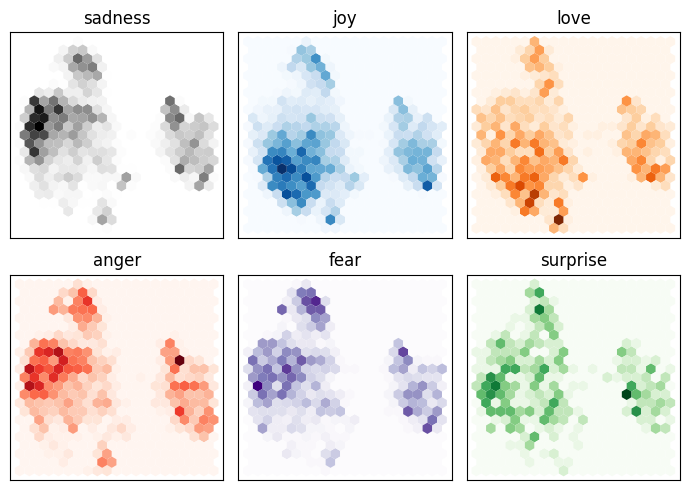

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(7, 5))
axes = axes.flatten()

cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(
    df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap, gridsize=20, linewidths=(0,)
  )
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [41]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.633

In [42]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

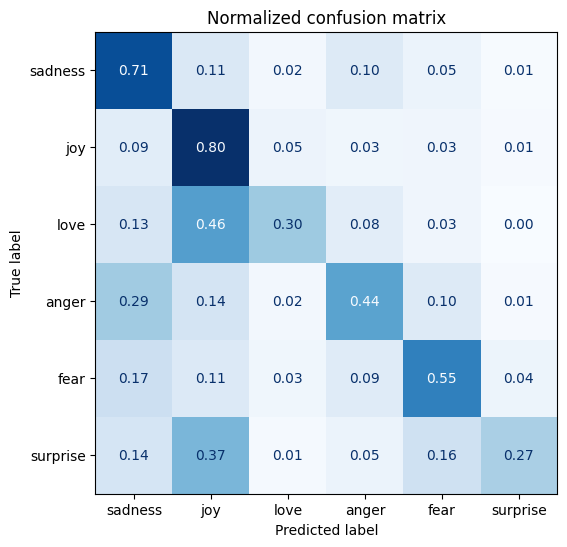

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_pred, y_true, labels):
  cm = confusion_matrix(y_true, y_pred, normalize="true")
  fig, ax = plt.subplots(figsize=(6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)


In [44]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

g:\MinConda_Data\envs\DL_env\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
from sklearn.metrics import accuracy_score, f1_score


def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}



In [46]:

from huggingface_hub import notebook_login

notebook_login()

In [47]:
from transformers import TrainingArguments, Trainer

batch_size = 64

logging_steps = len(emotions_encoded["train"])
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(
  output_dir=model_name,
  num_train_epochs=2,
  learning_rate=2e-5,
  per_device_train_batch_size=batch_size,
  per_device_eval_batch_size=batch_size,
  weight_decay=0.01,
  evaluation_strategy="epoch",
  disable_tqdm=False,
  logging_steps=logging_steps,
  push_to_hub=True,
  log_level="error",
)


In [48]:
from transformers import Trainer

trainer = Trainer(
  model=model,
  args=training_args,
  compute_metrics=compute_metrics,
  train_dataset=emotions_encoded["train"],
  eval_dataset=emotions_encoded["validation"],
  tokenizer=distilbert_tokenizer,
)
trainer.train()


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

{'eval_loss': 0.32569482922554016, 'eval_accuracy': 0.9, 'eval_f1': 0.8986945201983391, 'eval_runtime': 15.1399, 'eval_samples_per_second': 132.101, 'eval_steps_per_second': 2.114, 'epoch': 1.0}


  0%|          | 0/32 [00:00<?, ?it/s]

{'eval_loss': 0.23061788082122803, 'eval_accuracy': 0.9185, 'eval_f1': 0.9184480246885051, 'eval_runtime': 15.8254, 'eval_samples_per_second': 126.379, 'eval_steps_per_second': 2.022, 'epoch': 2.0}
{'train_runtime': 706.1531, 'train_samples_per_second': 45.316, 'train_steps_per_second': 0.708, 'train_loss': 0.5599589233398438, 'epoch': 2.0}


TrainOutput(global_step=500, training_loss=0.5599589233398438, metrics={'train_runtime': 706.1531, 'train_samples_per_second': 45.316, 'train_steps_per_second': 0.708, 'total_flos': 720342861696000.0, 'train_loss': 0.5599589233398438, 'epoch': 2.0})

In [49]:
preds_output = trainer.predict(emotions_encoded["validation"])
preds_output.metrics

  0%|          | 0/32 [00:00<?, ?it/s]

{'test_loss': 0.23061788082122803,
 'test_accuracy': 0.9185,
 'test_f1': 0.9184480246885051,
 'test_runtime': 13.7857,
 'test_samples_per_second': 145.077,
 'test_steps_per_second': 2.321}

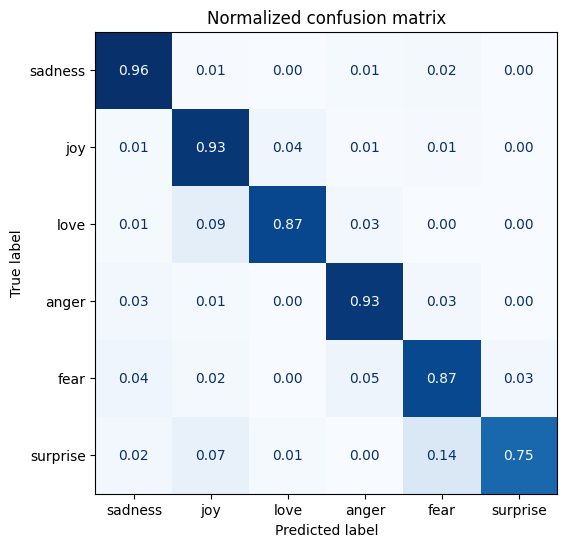

In [50]:
y_preds = np.argmax(preds_output.predictions, axis=1)
plot_confusion_matrix(y_preds, y_valid, labels)

In [51]:
from torch.nn.functional import cross_entropy


def forward_pass_with_label(batch):
  inputs = {
    k: v.to(device)
    for k, v in batch.items()
    if k in distilbert_tokenizer.model_input_names
  }

  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, batch["label"].to(device), reduction="none")

  return {"loss": loss.cpu().numpy(), "predicted_label": pred_label.cpu().numpy()}

emotions_encoded.set_format("torch",columns=["input_ids","attention_mask","label"])
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [52]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [53]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
882,i feel badly about reneging on my commitment t...,love,sadness,5.392302
1950,i as representative of everything thats wrong ...,surprise,sadness,5.188224
1274,i am going to several holiday parties and i ca...,joy,sadness,5.156665
1801,i feel that he was being overshadowed by the s...,love,sadness,5.104828
1963,i called myself pro life and voted for perry w...,joy,sadness,4.952019
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.878727
765,i feel super awkward and out of place right now,joy,sadness,4.868688
465,i would eventually go in to these stores but i...,joy,fear,4.829789
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.590648
405,i have been feeling extraordinarily indecisive...,fear,joy,4.396177


In [54]:
df_test.sort_values("loss",ascending=True).head(10)

,text,label,predicted_label,loss
19,i had lunch with an old friend and it was nice...,joy,joy,0.017149
1090,i dont know what it is about me and sweets the...,joy,joy,0.017199
1147,i type i feel bouncy and excited to get out my...,joy,joy,0.017428
530,i feel pretty safe but i do realize that we do...,joy,joy,0.017682
1873,i feel practically virtuous this month i have ...,joy,joy,0.017788
604,i don t like to use the h word recklessly but ...,joy,joy,0.017839
802,i hate hate hate watching people work and me s...,joy,joy,0.017884
1154,i love feeling carefree and without all these ...,joy,joy,0.018146
329,i have had my treasury selection on the front ...,joy,joy,0.018177
410,i feel like if he was innocent he wouldn t fee...,joy,joy,0.018241
